<a href="https://colab.research.google.com/github/AlanCarro/PROYECTO_FINAL-Alan_Emanuel_Carro/blob/main/Preentrega_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTREGA FINAL**

## **METADATA**



1- Descripcion de datos

Acciones de empresas a nivel mundial que cotizan en la bolsa Estadounidense. Cuenta con unas 11189 filas de datos y unas 42 columnas de datos semanales de cada indice utilizado. Fuentes de datos: https://finance.yahoo.com/

2- Diccionario de datos:

INDEX: Son las fechas semanales de los datos.

Open (indice): Es el precio de la apertura del indice.

High (indice): Es el máximo alcanzado en la semana del indice

Low (indice): Es el mínimo alcanzado en la semana del indice.

Volume (indice): El volumen semanal de operación que maneja cada indice.

Varianza (indice): La varianza semanal que sufrió el indice

Acciones: Apple, Microsoft, Google, Amazon, Nvidia, Amd, Intel


## **IMPORTACIÓN DE DATASET**

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

from datetime import datetime
from numpy import nan
from numpy import isnan

APPLE = yf.download('AAPL')
GOOGLE = yf.download('GOOGL')
MICROSOFT = yf.download('MSFT')
AMAZON = yf.download('AMZN')
NVIDIA = yf.download('NVDA')
AMD = yf.download('AMD')
INTEL = yf.download('INTC')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df= pd.concat([APPLE, GOOGLE, MICROSOFT, AMAZON, NVIDIA, AMD, INTEL], axis=1)
eliminar_columnas = ['Adj Close']
df = df.drop(eliminar_columnas, axis=1)
df.fillna(0, inplace=True)

empresas = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']
if 'Open APPLE' not in df.columns:
  nuevas_columnas = []
  for i in range(len(df.columns)):
    empresa = empresas[i // 5]
    columna = df.columns[i]
    nuevas_columnas.append(f'{columna} {empresa}')

df.columns = nuevas_columnas
df.columns

Index(['Open APPLE', 'High APPLE', 'Low APPLE', 'Close APPLE', 'Volume APPLE',
       'Open GOOGLE', 'High GOOGLE', 'Low GOOGLE', 'Close GOOGLE',
       'Volume GOOGLE', 'Open MICROSOFT', 'High MICROSOFT', 'Low MICROSOFT',
       'Close MICROSOFT', 'Volume MICROSOFT', 'Open AMAZON', 'High AMAZON',
       'Low AMAZON', 'Close AMAZON', 'Volume AMAZON', 'Open NVIDIA',
       'High NVIDIA', 'Low NVIDIA', 'Close NVIDIA', 'Volume NVIDIA',
       'Open AMD', 'High AMD', 'Low AMD', 'Close AMD', 'Volume AMD',
       'Open INTEL', 'High INTEL', 'Low INTEL', 'Close INTEL', 'Volume INTEL'],
      dtype='object')

In [4]:
for accion in empresas:
    columna_apertura = 'Open ' + accion
    columna_cierre = 'Close ' + accion
    columna_resta = (df[columna_apertura] - df[columna_cierre]) / df[columna_apertura]
    insert_position = (empresas.index(accion) + 1) * 5
    df.insert(insert_position,'Varianza ' + accion, columna_resta)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11189 entries, 1980-03-17 to 2024-08-02
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open APPLE          11189 non-null  float64
 1   High APPLE          11189 non-null  float64
 2   Low APPLE           11189 non-null  float64
 3   Close APPLE         11189 non-null  float64
 4   Volume APPLE        11189 non-null  float64
 5   Varianza APPLE      11001 non-null  float64
 6   Open GOOGLE         11189 non-null  float64
 7   High GOOGLE         11189 non-null  float64
 8   Low GOOGLE          11189 non-null  float64
 9   Close GOOGLE        11189 non-null  float64
 10  Varianza GOOGLE     5023 non-null   float64
 11  Volume GOOGLE       11189 non-null  float64
 12  Open MICROSOFT      11189 non-null  float64
 13  High MICROSOFT      11189 non-null  float64
 14  Low MICROSOFT       11189 non-null  float64
 15  Varianza MICROSOFT  9675 non-null   

In [6]:
columnas_seleccionadas = df.loc['2024-06-07', ['Open APPLE', 'Open GOOGLE', 'Open MICROSOFT', 'Open AMAZON', 'Open NVIDIA', 'Open AMD', 'Open INTEL']]
columnas_seleccionadas

,2024-06-07 00:00:00
Open APPLE,194.649994
Open GOOGLE,177.050003
Open MICROSOFT,426.200012
Open AMAZON,184.899994
Open NVIDIA,119.769997
Open AMD,166.589996
Open INTEL,30.250000


 ## **ANALISIS EXPLORATORIO DE DATOS**

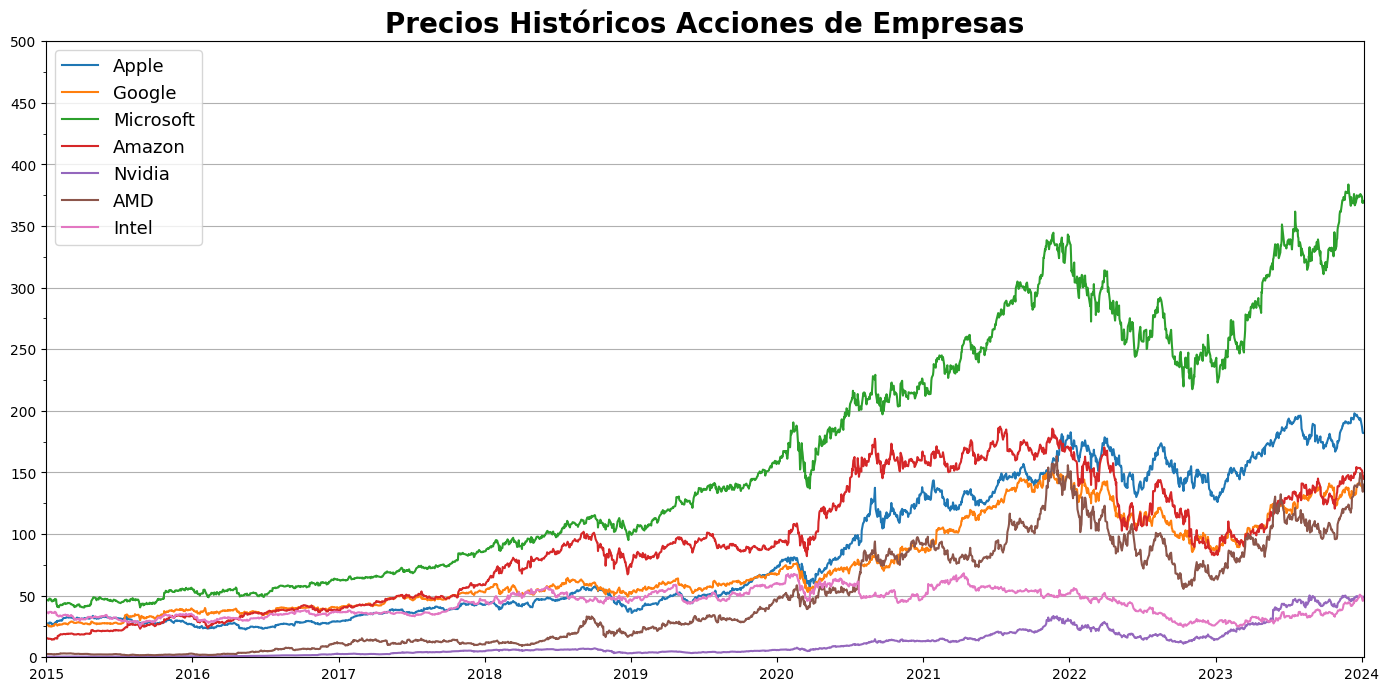

In [7]:
fig, ax = plt.subplots(figsize = (17, 8))


ax.set_title('Precios Históricos Acciones de Empresas', fontsize=20, weight='bold')
ax.plot(df.index, df['Open APPLE'], label= 'Apple')
ax.plot(df.index, df['Open GOOGLE'], label= 'Google')
ax.plot(df.index, df['Open MICROSOFT'], label= 'Microsoft')
ax.plot(df.index, df['Open AMAZON'], label= 'Amazon')
ax.plot(df.index, df['Open NVIDIA'], label= 'Nvidia')
ax.plot(df.index, df['Open AMD'], label= 'AMD')
ax.plot(df.index, df['Open INTEL'], label= 'Intel')
ax.legend(loc='upper left', fontsize=13)
ax.set_xlim(pd.to_datetime('1/1/2015'), pd.to_datetime('1/6/2024'))
plt.ylim(bottom=0, top=500)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(25))

ax.grid(axis='y')

Text(0, 0.5, 'INTEL')

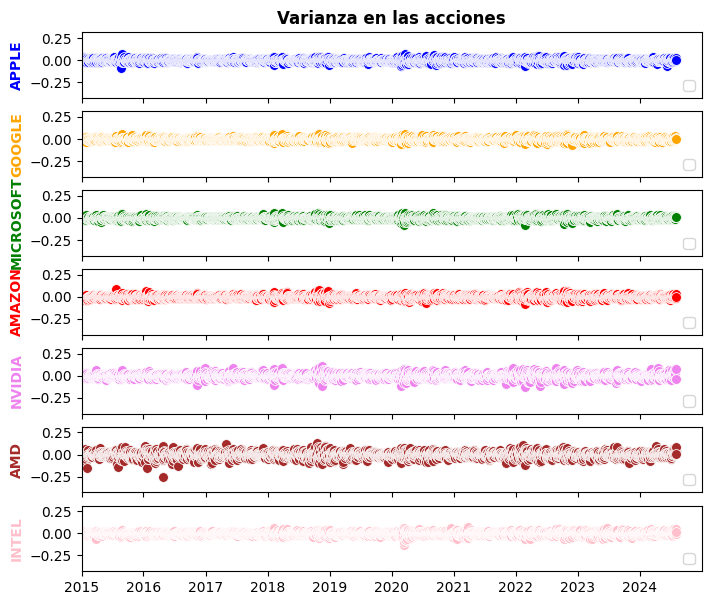

In [8]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 7), sharex=True, sharey=True)

sns.scatterplot(data=df, x= df.index, y=df['Varianza APPLE'],ax=ax[0], color='blue', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza GOOGLE'],ax=ax[1], color='orange', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza MICROSOFT'],ax=ax[2], color='green', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza AMAZON'],ax=ax[3], color='red', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza NVIDIA'],ax=ax[4], color='violet', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza AMD'],ax=ax[5], color='brown', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza INTEL'],ax=ax[6], color='pink', s=50)

for a in ax:
    a.set_xlim(pd.to_datetime('01/01/2015'), pd.to_datetime('12/31/2024'))
    a.legend(loc='lower right', fontsize=10)
    a.set_ylabel('')
    a.set_xlabel('')

ax[0].set_title('Varianza en las acciones', weight='bold')
ax[3].set_xlabel('Año')
ax[0].set_ylabel('APPLE',color='blue',weight='bold')
ax[1].set_ylabel('GOOGLE',color='orange',weight='bold')
ax[2].set_ylabel('MICROSOFT',color='green',weight='bold')
ax[3].set_ylabel('AMAZON',color='red',weight='bold')
ax[4].set_ylabel('NVIDIA',color='violet',weight='bold')
ax[5].set_ylabel('AMD',color='brown',weight='bold')
ax[6].set_ylabel('INTEL',color='pink',weight='bold')

Text(0.5, 1.0, 'Volumen diario Acciones')

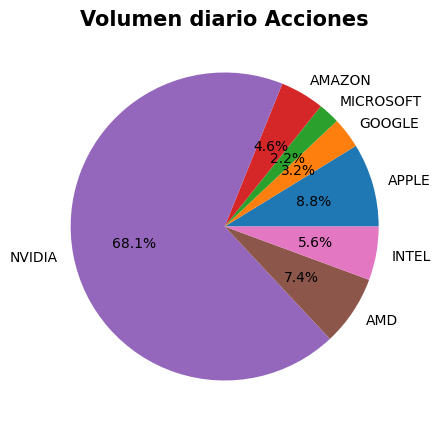

In [9]:
columnas_seleccionadas = df.loc['2024-06-07', ['Volume APPLE', 'Volume GOOGLE', 'Volume MICROSOFT', 'Volume AMAZON', 'Volume NVIDIA', 'Volume AMD', 'Volume INTEL']]

fig,ax = plt.subplots(figsize =(5, 5))

vol_indices = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']
ax.pie(columnas_seleccionadas, labels = vol_indices,autopct='%1.1f%%')

plt.title('Volumen diario Acciones', fontsize=15, weight='bold', loc = 'center')

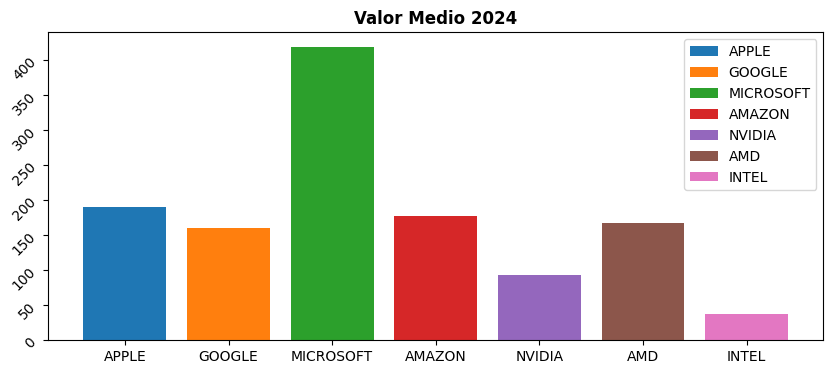

In [10]:
plt.figure(figsize=(10, 4))
df_rango = df.loc['2024-01-01':'2024-12-31']

media1 = df_rango['Open APPLE'].mean()
media2 = df_rango['Open GOOGLE'].mean()
media3 = df_rango['Open MICROSOFT'].mean()
media4 = df_rango['Open AMAZON'].mean()
media5 = df_rango['Open NVIDIA'].mean()
media6 = df_rango['Open AMD'].mean()
media7 = df_rango['Open INTEL'].mean()

medias = [media1 ,media2 ,media3 ,media4 ,media5 ,media6 ,media7]
column = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']

for i in range(len(column)):
    plt.bar(column[i],
            medias[i],
            label=column[i])

plt.title('Valor Medio 2024',weight='bold')

plt.yticks(rotation=45)
plt.legend()

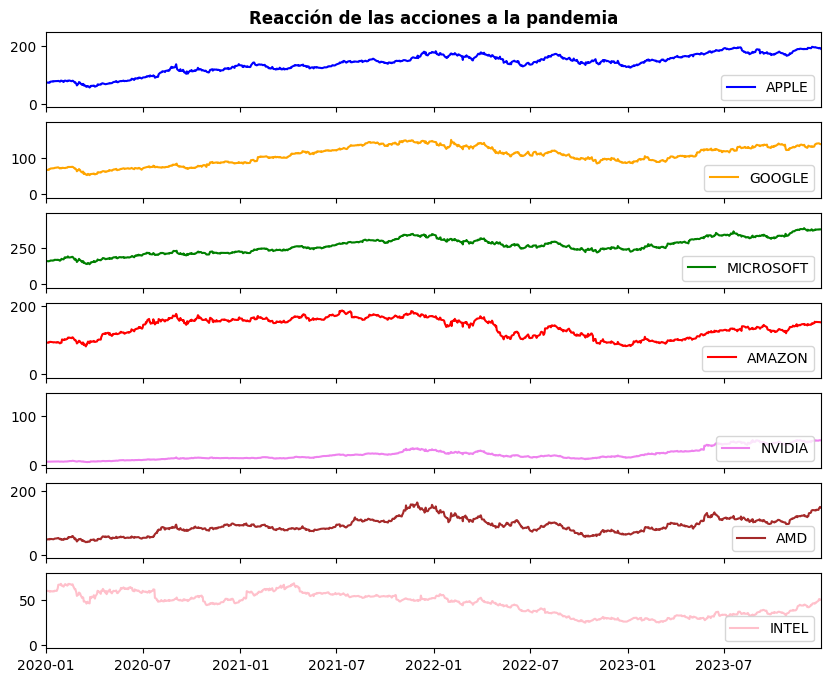

In [11]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10, 8), sharex=True)

sns.lineplot(x=df.index, y=df['Open APPLE'], color='blue',label='APPLE', ax=ax[0])
sns.lineplot(x=df.index, y=df['Open GOOGLE'], color='orange',label='GOOGLE', ax=ax[1])
sns.lineplot(x=df.index, y=df['Open MICROSOFT'], color='green',label='MICROSOFT', ax=ax[2])
sns.lineplot(x=df.index, y=df['Open AMAZON'], color='red',label='AMAZON', ax=ax[3])
sns.lineplot(x=df.index, y=df['Open NVIDIA'], color='violet',label='NVIDIA', ax=ax[4])
sns.lineplot(x=df.index, y=df['Open AMD'], color='brown',label='AMD', ax=ax[5])
sns.lineplot(x=df.index, y=df['Open INTEL'], color='pink',label='INTEL', ax=ax[6])

ax[0].set_title('Reacción de las acciones a la pandemia',weight='bold')

for a in ax:
    a.set_xlim(pd.to_datetime('01/01/2020'), pd.to_datetime('12/31/2023'))
    a.legend(loc='lower right', fontsize=10)
    a.set_ylabel('')
    a.set_xlabel('')

## **REGRESIÓN**


### Transformación de los Modelos

In [34]:
from   scipy import stats
import statsmodels.formula.api as sm
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score


In [35]:
pd.options.mode.chained_assignment = None
df_limitado = df.head(10000)
df_limitado['media_precios'] = df_limitado[['Open APPLE', 'Open GOOGLE', 'Open MICROSOFT', 'Open AMAZON', 'Open NVIDIA', 'Open AMD', 'Open INTEL']].mean(axis=1)

df_final = df_limitado.drop(['Open APPLE', 'High APPLE', 'Low APPLE', 'Close APPLE', 'Volume APPLE',
       'Open GOOGLE', 'High GOOGLE', 'Low GOOGLE', 'Close GOOGLE',
       'Volume GOOGLE', 'Open MICROSOFT', 'High MICROSOFT', 'Low MICROSOFT',
       'Close MICROSOFT', 'Volume MICROSOFT', 'Open AMAZON', 'High AMAZON',
       'Low AMAZON', 'Close AMAZON', 'Volume AMAZON', 'Open NVIDIA',
       'High NVIDIA', 'Low NVIDIA', 'Close NVIDIA', 'Volume NVIDIA',
       'Open AMD', 'High AMD', 'Low AMD', 'Close AMD', 'Volume AMD',
       'Open INTEL', 'High INTEL', 'Low INTEL', 'Close INTEL', 'Volume INTEL'], axis=1)



In [ ]:
df_limitado.corr()

#### Modelo Lineal

In [37]:
semanas = ((df.index - pd.Timestamp('1960-12-21')) / np.timedelta64(1, 'W')).values.reshape(-1, 1)
semanas = semanas[:10000]

x = semanas
y = df_limitado['media_precios']

x, X_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
modelo = LinearRegression()

modelo.fit(x, y)

prediccion_precios_gral = modelo.predict(x)

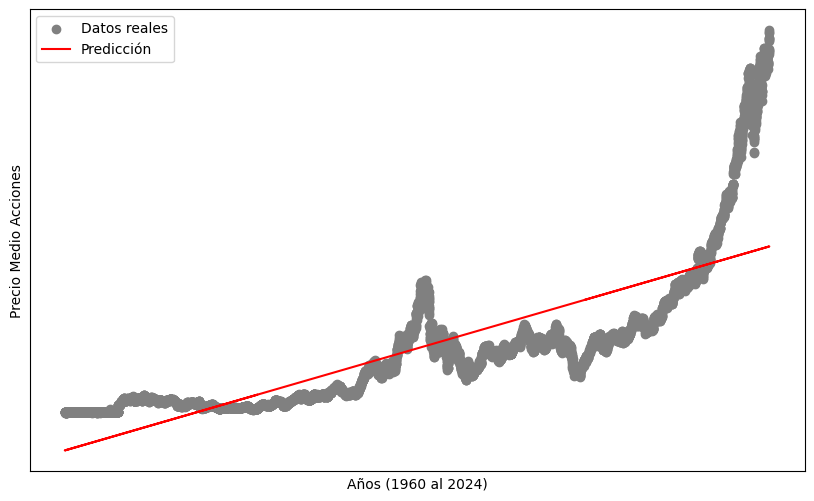

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, color='gray', label='Datos reales')
ax.plot(x, prediccion_precios_gral, color='red', label='Predicción')
ax.set_xlabel('Años (1960 al 2024)')
ax.set_ylabel('Precio Medio Acciones')

ax.set_xticks([])
ax.set_yticks([])
ax.legend()

plt.show()

In [39]:
print('MAE:',mean_absolute_error(y, prediccion_precios_gral))
print("MSE:", np.sqrt(mean_squared_error(y, prediccion_precios_gral)))
print("R^2:", r2_score(y, prediccion_precios_gral))

MAE: 5.353102006836236
MSE: 7.699218118671095
R^2: 0.6380356881895615


#### Modelo SVR

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = SVR(kernel="linear")
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


In [42]:
print('MAE:',mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MAE: 6.928787644655733
MSE: 159.55111758303588
R^2: 0.06451838297407642


#### Modelo Polinomial

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
modelo_polinomial = LinearRegression()
modelo_polinomial.fit(X_train, y_train)
prediccion_polinomial = modelo_polinomial.predict(X_test)

mae = mean_absolute_error(y_test, prediccion_polinomial)
mse = mean_squared_error(y_test, prediccion_polinomial)
r2 = r2_score(y_test, prediccion_polinomial)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 5.404448368737185
MSE: 59.981430369554346
R²: 0.6483163118902243


## **CONCLUSIONES DEL MODELO**

Finalizando el análisis de los datos podemos determinar que el algoritmo que mejor representa una mejor predicción futura de los seleccionados para este proyecto es la regresión lineal.

La misma deja en claro en base a las tres métricas MAE, MSE y R2. La que tuvo una mejor performance en las tres fue regresión lineal por poca diferencia en cuanto a la regresión lineal. Pero la que tuvo un peor rendimiento para intentar predecir los precios futuros de las acciones fue SVR. Esto mismo esta explicado por un MAE y un MSE bajos en comparación a los otros algoritmos elegidos y un R2 más cercano a 1 que el resto. A pesar de que en diferentes ciencias no se toma un valor de R2 o de las demas métricas como referencia, en ciencias como la economía un R2 fuerte se explica en valores superiores a un 80%.

Tomando un conclusión luego del análisis completo podemos determinar que la regresión lineal es la mejor de las tres pero quizas no la mejor para poder predecir precios futuros con mayor eficacia.